<a href="https://colab.research.google.com/github/ZobeidaNava/ZobeidaNv/blob/master/Proy_MINERIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Importamos librerias y conjunto de datos 
#Datos referentes a pacientos con Covid-19 en México.
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()
import io
df=pd.read_csv(io.StringIO(uploaded['200514COVID19MEXICO.csv'].decode('ISO-8859-1'))) 

Saving 200514COVID19MEXICO.csv to 200514COVID19MEXICO.csv


In [0]:
#Hacemos un escaneo de los datos para entender como se comportan las columnas.
df.describe()

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,UCI
count,155932.000000,155932.000000,155932.000000,155932.000000,155932.000000,155932.000000,155932.000000,155932.000000,155932.000000,155932.000000,155932.000000,155932.000000,155932.000000,155932.000000,155932.000000,155932.000000,155932.000000,155932.000000,155932.000000,155932.000000,155932.000000,155932.000000,155932.000000,155932.000000,155932.000000,155932.00000,155932.000000,155932.000000
mean,1.635117,9.619289,14.545982,1.510415,15.992362,14.819152,35.349338,1.255785,72.699221,1.827232,42.517251,1.009305,50.659711,4.317401,2.259453,2.354661,2.340495,2.386200,2.210213,2.481351,2.361626,2.223694,2.352455,2.276698,34.330112,1.89836,98.565945,72.698413
std,0.481399,8.005199,7.930656,0.499893,11.228051,7.849520,44.719936,0.436303,41.472949,0.831616,17.026026,0.096015,47.496824,14.849114,6.141177,6.005615,6.037362,6.244873,6.068848,7.070229,6.108154,6.111388,5.995977,5.971359,46.087682,0.65906,6.487187,41.475071
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
25%,1.000000,4.000000,9.000000,1.000000,9.000000,9.000000,7.000000,1.000000,2.000000,2.000000,31.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.00000,99.000000,2.000000
50%,2.000000,12.000000,14.000000,2.000000,15.000000,14.000000,20.000000,1.000000,97.000000,2.000000,41.000000,1.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,99.000000,97.000000
75%,2.000000,12.000000,19.000000,2.000000,21.000000,19.000000,46.000000,2.000000,97.000000,2.000000,53.000000,1.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,2.00000,99.000000,97.000000
max,2.000000,99.000000,32.000000,2.000000,99.000000,32.000000,999.000000,2.000000,99.000000,99.000000,120.000000,2.000000,98.000000,99.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000,3.00000,99.000000,99.000000


In [0]:
#información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155932 entries, 0 to 155931
Data columns (total 35 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   FECHA_ACTUALIZACION  155932 non-null  object
 1   ID_REGISTRO          155932 non-null  object
 2   ORIGEN               155932 non-null  int64 
 3   SECTOR               155932 non-null  int64 
 4   ENTIDAD_UM           155932 non-null  int64 
 5   SEXO                 155932 non-null  int64 
 6   ENTIDAD_NAC          155932 non-null  int64 
 7   ENTIDAD_RES          155932 non-null  int64 
 8   MUNICIPIO_RES        155932 non-null  int64 
 9   TIPO_PACIENTE        155932 non-null  int64 
 10  FECHA_INGRESO        155932 non-null  object
 11  FECHA_SINTOMAS       155932 non-null  object
 12  FECHA_DEF            155932 non-null  object
 13  INTUBADO             155932 non-null  int64 
 14  NEUMONIA             155932 non-null  int64 
 15  EDAD                 155932 non-nu

In [0]:
import statistics as stats
lista_conteo = []
for column in df.columns:
  print("Atributo : ",df[column].name)
  print("DatosDistintos")
  print(df[column].unique())
  lista_conteo = df[column].unique()
  print("Conteo de datos distintos: ",len(lista_conteo))
#  print("Varianza de los datos :",df[column].mean())
  #for rows in df[column]:

  print("**------------------------------------------------------------------**")


Atributo :  FECHA_ACTUALIZACION
DatosDistintos
['14/05/2020']
Conteo de datos distintos:  1
**------------------------------------------------------------------**
Atributo :  ID_REGISTRO
DatosDistintos
['03210d' '0e00d2' '03f822' ... '0ef7d9' '1b6ef0' '09266b']
Conteo de datos distintos:  155499
**------------------------------------------------------------------**
Atributo :  ORIGEN
DatosDistintos
[2 1]
Conteo de datos distintos:  2
**------------------------------------------------------------------**
Atributo :  SECTOR
DatosDistintos
[ 4  3 99  6  9  8 11 12 10  7 13  2  1]
Conteo de datos distintos:  13
**------------------------------------------------------------------**
Atributo :  ENTIDAD_UM
DatosDistintos
[31  9 22  2 25 15 26 23 27  8 12 30  5 14 17 21  7  1 13 16 18 28 19 10
 20  6 29 11  4  3 32 24]
Conteo de datos distintos:  32
**------------------------------------------------------------------**
Atributo :  SEXO
DatosDistintos
[1 2]
Conteo de datos distintos:  2
**-----

In [0]:
#Determinarmos si existen datos faltantes y si los hay elimina el esa fila.
df.dropna()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,14/05/2020,03210d,2,4,31,1,31,31,50,1,08/04/2020,06/04/2020,9999-99-99,97,2,52,1,2,2,2,2,2,2,2,1,2,1,2,2,99,1,99,México,99,97
1,14/05/2020,0e00d2,2,4,9,1,9,9,16,1,14/04/2020,10/04/2020,21/04/2020,97,2,61,1,2,2,2,2,2,2,2,2,2,2,2,2,99,1,99,México,99,97
2,14/05/2020,03f822,2,4,9,2,12,23,8,1,17/04/2020,12/04/2020,9999-99-99,97,2,37,1,97,2,2,2,2,2,2,2,2,2,2,2,99,1,99,México,99,97
3,14/05/2020,2430,2,4,22,2,22,22,14,1,17/04/2020,14/04/2020,9999-99-99,97,2,49,1,97,2,2,2,2,2,2,2,2,2,2,2,99,1,99,México,99,97
4,14/05/2020,0930ff,2,4,9,2,9,15,121,2,23/04/2020,20/04/2020,24/04/2020,2,1,62,1,97,2,2,2,2,2,1,2,1,2,2,2,99,1,99,México,99,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155927,14/05/2020,82616,2,12,9,2,9,9,16,1,07/05/2020,05/05/2020,9999-99-99,97,2,26,1,97,2,2,2,2,2,2,2,2,1,2,2,1,3,99,México,99,97
155928,14/05/2020,1ca324,2,12,9,1,9,9,7,1,07/05/2020,02/05/2020,9999-99-99,97,2,37,1,2,2,2,2,2,2,2,2,2,2,2,2,1,3,99,México,99,97
155929,14/05/2020,0ef7d9,1,12,15,2,15,15,99,2,06/05/2020,04/05/2020,9999-99-99,1,1,56,1,97,2,1,2,2,2,1,2,2,2,2,2,2,3,99,México,99,2
155930,14/05/2020,1b6ef0,2,12,9,1,9,9,17,1,07/05/2020,05/05/2020,9999-99-99,97,2,50,1,2,2,2,2,2,2,1,2,2,2,2,2,1,3,99,México,99,97


In [0]:
#Como la columan de fecha de defunción tiene un valor 9999-99-99 para pacientes que no murieron mientras se llevaba a cabo la actualizacion, la cambiaremos por 99/99/9999 que es formato fecha 
df = df.replace({"9999-99-99": "99/99/9999"})

In [0]:
df

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,14/05/2020,03210d,2,4,31,1,31,31,50,1,08/04/2020,06/04/2020,99/99/9999,97,2,52,1,2,2,2,2,2,2,2,1,2,1,2,2,99,1,99,México,99,97
1,14/05/2020,0e00d2,2,4,9,1,9,9,16,1,14/04/2020,10/04/2020,21/04/2020,97,2,61,1,2,2,2,2,2,2,2,2,2,2,2,2,99,1,99,México,99,97
2,14/05/2020,03f822,2,4,9,2,12,23,8,1,17/04/2020,12/04/2020,99/99/9999,97,2,37,1,97,2,2,2,2,2,2,2,2,2,2,2,99,1,99,México,99,97
3,14/05/2020,2430,2,4,22,2,22,22,14,1,17/04/2020,14/04/2020,99/99/9999,97,2,49,1,97,2,2,2,2,2,2,2,2,2,2,2,99,1,99,México,99,97
4,14/05/2020,0930ff,2,4,9,2,9,15,121,2,23/04/2020,20/04/2020,24/04/2020,2,1,62,1,97,2,2,2,2,2,1,2,1,2,2,2,99,1,99,México,99,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155927,14/05/2020,82616,2,12,9,2,9,9,16,1,07/05/2020,05/05/2020,99/99/9999,97,2,26,1,97,2,2,2,2,2,2,2,2,1,2,2,1,3,99,México,99,97
155928,14/05/2020,1ca324,2,12,9,1,9,9,7,1,07/05/2020,02/05/2020,99/99/9999,97,2,37,1,2,2,2,2,2,2,2,2,2,2,2,2,1,3,99,México,99,97
155929,14/05/2020,0ef7d9,1,12,15,2,15,15,99,2,06/05/2020,04/05/2020,99/99/9999,1,1,56,1,97,2,1,2,2,2,1,2,2,2,2,2,2,3,99,México,99,2
155930,14/05/2020,1b6ef0,2,12,9,1,9,9,17,1,07/05/2020,05/05/2020,99/99/9999,97,2,50,1,2,2,2,2,2,2,1,2,2,2,2,2,1,3,99,México,99,97


In [0]:
#Dandole un sentido a la investigación y aterrizando una idea se decidió : Dentro de la población femenina, ¿Cual es la probabilidad de mortalidad en rangos de edades?
#El Sexo =2 es FEMENINO 
import collections
collections.Counter(df.SEXO)

Counter({1: 76342, 2: 79590})

In [0]:
# Por ello hacemos un DataFrame que contenta los registros de la población femenina  df_fem
df_fem = df[df.SEXO == 2]
#Ahora haciendo un filtro de las variables que tengan un nivel de importancia con respecto a la investigación, quitamos manualmente las siguientes:
#-> FECHA_ACTUALIZACION 
#-> ID_REGISTRO
#-> OTRO_CASO
#-> PAIS_NACIONALIDAD ya que hablamos de méxico
#-> PAIS_ORIGEN

df_fem = df_fem.drop(['FECHA_ACTUALIZACION','ID_REGISTRO','OTRO_CASO','PAIS_NACIONALIDAD','PAIS_ORIGEN'], axis=1)


In [0]:
df_fem

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO,MIGRANTE,UCI
2,2,4,9,2,12,23,8,1,17/04/2020,12/04/2020,99/99/9999,97,2,37,1,97,2,2,2,2,2,2,2,2,2,2,2,1,99,97
3,2,4,22,2,22,22,14,1,17/04/2020,14/04/2020,99/99/9999,97,2,49,1,97,2,2,2,2,2,2,2,2,2,2,2,1,99,97
4,2,4,9,2,9,15,121,2,23/04/2020,20/04/2020,24/04/2020,2,1,62,1,97,2,2,2,2,2,1,2,1,2,2,2,1,99,2
5,2,4,9,2,9,9,3,1,28/04/2020,27/04/2020,99/99/9999,97,2,51,1,97,2,2,1,2,2,1,2,1,1,2,2,1,99,97
6,2,4,9,2,9,9,7,1,29/04/2020,22/04/2020,99/99/9999,97,2,42,1,97,2,2,2,2,2,2,2,2,1,2,2,1,99,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155922,1,4,15,2,15,15,57,2,10/05/2020,10/05/2020,99/99/9999,2,1,70,1,97,2,2,2,2,2,1,2,2,2,2,1,3,99,2
155924,1,12,9,2,9,9,3,1,11/05/2020,07/05/2020,99/99/9999,97,2,36,1,97,2,2,2,2,2,2,2,2,2,2,2,3,99,97
155925,2,12,9,2,9,9,15,1,10/05/2020,08/05/2020,99/99/9999,97,2,41,1,97,2,2,2,2,2,2,2,2,2,1,2,3,99,97
155927,2,12,9,2,9,9,16,1,07/05/2020,05/05/2020,99/99/9999,97,2,26,1,97,2,2,2,2,2,2,2,2,1,2,2,3,99,97


In [0]:
#FUNCION PARA DETERMINAR LA CANTIDAD DE DIAS ENTRE FECHAS 
from datetime import datetime

def days_between(d1, d2):
       d1 = datetime.strptime(d1, "%d/%m/%Y")
       d2 = datetime.strptime(d2, "%d/%m/%Y")
       return abs((d2 - d1).days)
df_fem['DIAS_SINTOM_DEFUNC']=0


In [0]:
#Obteniendo los días de diferencia entre la fecha de sintomas y la fecha de defunción, y se guarda en la columna de DIAS_SINTOM_DEFUNC
for index, row in df_fem.iterrows():
  if not df_fem.FECHA_DEF[index] == "99/99/9999":
    df_fem.DIAS_SINTOM_DEFUNC[index]=days_between(df_fem.FECHA_SINTOMAS[index],df_fem.FECHA_DEF[index])
  else: 
    df_fem.DIAS_SINTOM_DEFUNC[index]=0
        

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [0]:
#POR LO TANTO ELIMINAMOS LAS COLUMNAS QUE REFIEREN A FECHAS
df_fem = df_fem.drop(['FECHA_INGRESO','FECHA_SINTOMAS','FECHA_DEF','NACIONALIDAD'], axis=1)
df_fem

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,INTUBADO,NEUMONIA,EDAD,EMBARAZO,HABLA_LENGUA_INDIG,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO,MIGRANTE,UCI,DIAS_SINTOM_DEFUNC
2,2,4,9,2,12,23,8,1,97,2,37,97,2,2,2,2,2,2,2,2,2,2,2,1,99,97,0
3,2,4,22,2,22,22,14,1,97,2,49,97,2,2,2,2,2,2,2,2,2,2,2,1,99,97,0
4,2,4,9,2,9,15,121,2,2,1,62,97,2,2,2,2,2,1,2,1,2,2,2,1,99,2,4
5,2,4,9,2,9,9,3,1,97,2,51,97,2,2,1,2,2,1,2,1,1,2,2,1,99,97,0
6,2,4,9,2,9,9,7,1,97,2,42,97,2,2,2,2,2,2,2,2,1,2,2,1,99,97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155922,1,4,15,2,15,15,57,2,2,1,70,97,2,2,2,2,2,1,2,2,2,2,1,3,99,2,0
155924,1,12,9,2,9,9,3,1,97,2,36,97,2,2,2,2,2,2,2,2,2,2,2,3,99,97,0
155925,2,12,9,2,9,9,15,1,97,2,41,97,2,2,2,2,2,2,2,2,2,1,2,3,99,97,0
155927,2,12,9,2,9,9,16,1,97,2,26,97,2,2,2,2,2,2,2,2,1,2,2,3,99,97,0


In [0]:
contador=0
for index, row in df_fem.iterrows():
  if not df_fem.DIAS_SINTOM_DEFUNC[index] == 0:
    contador+=1
contador

4291

In [0]:
df_fem.sort_values('EDAD',ascending=True)


,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,INTUBADO,NEUMONIA,EDAD,EMBARAZO,HABLA_LENGUA_INDIG,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO,MIGRANTE,UCI,DIAS_SINTOM_DEFUNC
143409,1,4,8,2,8,8,37,1,97,2,0,97,2,2,2,2,2,2,2,2,2,2,2,3,99,97,0
119243,1,4,9,2,9,9,7,2,2,2,0,97,2,2,2,2,2,2,2,1,2,2,2,2,99,2,1
66412,2,12,20,2,20,20,20,2,2,1,0,97,2,2,2,2,2,2,2,2,2,2,2,2,99,2,0
17403,1,4,9,2,15,9,16,2,2,1,0,97,2,1,2,2,2,2,2,2,2,2,2,1,99,2,0
89183,1,12,9,2,9,9,5,2,1,2,0,97,2,2,2,2,2,2,2,2,2,2,2,2,99,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10148,2,12,27,2,27,27,4,1,97,2,103,97,99,2,2,2,2,1,2,2,2,2,2,1,99,97,0
151305,2,12,9,2,30,9,3,1,97,2,104,97,99,1,2,2,2,2,2,2,2,2,2,3,99,97,0
150236,1,9,9,2,9,15,57,2,2,2,106,97,2,2,2,2,2,2,2,2,2,2,2,3,99,2,0
67148,2,12,16,2,16,16,52,1,97,2,108,97,2,2,2,2,2,2,2,2,2,2,2,2,99,97,0


In [0]:
#Como las edades van desde 0-114 en los casos de mujeres con covid-19
#Tomaré como grupos de edades las siguientes.

#Primera Infancia (0-5 años)
#Infancia (6 - 11 años)
#Adolescencia (12 - 18 años)
#Juventud (19 - 35 años)
#Madurez (36 - 50 años)
#Adultez Madura (50 - 65 años)
#Tercera Edad (65 años en adelante)

#Crearé una columna que de el porcentaje de muerte por grupo de edades y se las asignaré a cada registro


In [0]:

conteo_0_5=0
conteo_6_11=0
conteo_12_18=0
conteo_19_35=0
conteo_36_50=0
conteo_50_65=0
conteo_65_adl=0
for index, row in df_fem.iterrows():
  #Primer Grupo
  if df_fem.EDAD[index]<=5 and df_fem.EDAD[index] >= 0 and df_fem.DIAS_SINTOM_DEFUNC[index] != 0:
    conteo_0_5 +=1
  #Segundo Grupo
  if df_fem.EDAD[index]<=11 and df_fem.EDAD[index] >= 6 and df_fem.DIAS_SINTOM_DEFUNC[index] != 0:
    conteo_6_11 +=1
  #Tercer Grupo
  if df_fem.EDAD[index]<=18 and df_fem.EDAD[index] >= 12 and df_fem.DIAS_SINTOM_DEFUNC[index] != 0:
    conteo_12_18 +=1
  #Cuarto Grupo
  if df_fem.EDAD[index]<=35 and df_fem.EDAD[index] >= 19 and df_fem.DIAS_SINTOM_DEFUNC[index] != 0:
    conteo_19_35 +=1
  #Quinto Grupo
  if df_fem.EDAD[index]<=50 and df_fem.EDAD[index] >= 36 and df_fem.DIAS_SINTOM_DEFUNC[index] != 0:
    conteo_36_50 +=1
  #Sexto Grupo
  if df_fem.EDAD[index]<=65 and df_fem.EDAD[index] > 50 and df_fem.DIAS_SINTOM_DEFUNC[index] != 0:
    conteo_50_65 +=1
  #Séptimo Grupo
  if df_fem.EDAD[index]<=114 and df_fem.EDAD[index] >65 and df_fem.DIAS_SINTOM_DEFUNC[index] != 0:
    conteo_65_adl +=1
#Muestra el numero de personas muertas en rangos de edades
print("Personas de Primera infancia muertos",conteo_0_5)
print("Personas de Infancia muertos",conteo_6_11) 
print("Personas de Adolescencia muertos",conteo_12_18)  
print("Personas de Juventud muertos",conteo_19_35)
print("Personas de Madurez muertos",conteo_36_50)  
print("Personas de Adultez Madurez muertos",conteo_50_65)
print("Personas en Tercera Edad muertos",conteo_65_adl)

#Aqui muestra el numero de personas en cada grupo de edades
#print(((0<=df_fem.EDAD) & (5>=df_fem.EDAD)).sum())
#print(((6<=df_fem.EDAD) & (11>=df_fem.EDAD)).sum())
#print(((12<=df_fem.EDAD) & (18>=df_fem.EDAD)).sum())
#print(((19<=df_fem.EDAD) & (35>=df_fem.EDAD)).sum())
#print(((36<=df_fem.EDAD) & (50>=df_fem.EDAD)).sum())
#print(((50<df_fem.EDAD) & (65>df_fem.EDAD)).sum())
#print(((65<=df_fem.EDAD) & (114>=df_fem.EDAD)).sum())

df_fem['MORTALIDAD_POR_GRUPO']=0.0

for index, row in df_fem.iterrows():
  if df_fem.EDAD[index]<=5 and df_fem.EDAD[index] >= 0:
    df_fem.MORTALIDAD_POR_GRUPO[index] = conteo_0_5 / ((0<=df_fem.EDAD) & (5>=df_fem.EDAD)).sum()
  if df_fem.EDAD[index]<=11 and df_fem.EDAD[index] >= 6 :
     df_fem.MORTALIDAD_POR_GRUPO[index] = conteo_6_11 / ((6<=df_fem.EDAD) & (11>=df_fem.EDAD)).sum()
  if df_fem.EDAD[index]<=18 and df_fem.EDAD[index] >= 12:
     df_fem.MORTALIDAD_POR_GRUPO[index] = conteo_12_18 / ((12<=df_fem.EDAD) & (18>=df_fem.EDAD)).sum()
  if df_fem.EDAD[index]<=35 and df_fem.EDAD[index] >= 19:
     df_fem.MORTALIDAD_POR_GRUPO[index] = conteo_19_35 / ((19<=df_fem.EDAD) & (35>=df_fem.EDAD)).sum()
  if df_fem.EDAD[index]<=50 and df_fem.EDAD[index] >= 36 :
     df_fem.MORTALIDAD_POR_GRUPO[index] = conteo_36_50 / ((36<=df_fem.EDAD) & (50>=df_fem.EDAD)).sum()
  if df_fem.EDAD[index]<=65 and df_fem.EDAD[index] > 50:
     df_fem.MORTALIDAD_POR_GRUPO[index] = conteo_50_65  / ((50<df_fem.EDAD) & (65>df_fem.EDAD)).sum()
  if df_fem.EDAD[index]<=114 and df_fem.EDAD[index] >65:
    df_fem.MORTALIDAD_POR_GRUPO[index] = conteo_65_adl / ((65<=df_fem.EDAD) & (114>=df_fem.EDAD)).sum()


Personas de Primera infancia muertos 43
Personas de Infancia muertos 9
Personas de Adolescencia muertos 19
Personas de Juventud muertos 231
Personas de Madurez muertos 964
Personas de Adultez Madurez muertos 1616
Personas en Tercera Edad muertos 1409


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to b

In [0]:
df_fem.sort_values('EDAD',ascending=True)


,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,INTUBADO,NEUMONIA,EDAD,EMBARAZO,HABLA_LENGUA_INDIG,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,RESULTADO,MIGRANTE,UCI,DIAS_SINTOM_DEFUNC,MORTALIDAD_POR_GRUPO
143409,1,4,8,2,8,8,37,1,97,2,0,97,2,2,2,2,2,2,2,2,2,2,2,3,99,97,0,0.022667
119243,1,4,9,2,9,9,7,2,2,2,0,97,2,2,2,2,2,2,2,1,2,2,2,2,99,2,1,0.022667
66412,2,12,20,2,20,20,20,2,2,1,0,97,2,2,2,2,2,2,2,2,2,2,2,2,99,2,0,0.022667
17403,1,4,9,2,15,9,16,2,2,1,0,97,2,1,2,2,2,2,2,2,2,2,2,1,99,2,0,0.022667
89183,1,12,9,2,9,9,5,2,1,2,0,97,2,2,2,2,2,2,2,2,2,2,2,2,99,1,0,0.022667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10148,2,12,27,2,27,27,4,1,97,2,103,97,99,2,2,2,2,1,2,2,2,2,2,1,99,97,0,0.151229
151305,2,12,9,2,30,9,3,1,97,2,104,97,99,1,2,2,2,2,2,2,2,2,2,3,99,97,0,0.151229
150236,1,9,9,2,9,15,57,2,2,2,106,97,2,2,2,2,2,2,2,2,2,2,2,3,99,2,0,0.151229
67148,2,12,16,2,16,16,52,1,97,2,108,97,2,2,2,2,2,2,2,2,2,2,2,2,99,97,0,0.151229


In [0]:
import sklearn
from sklearn.model_selection import train_test_split
#type(df_fem)
#df_fem.keys()


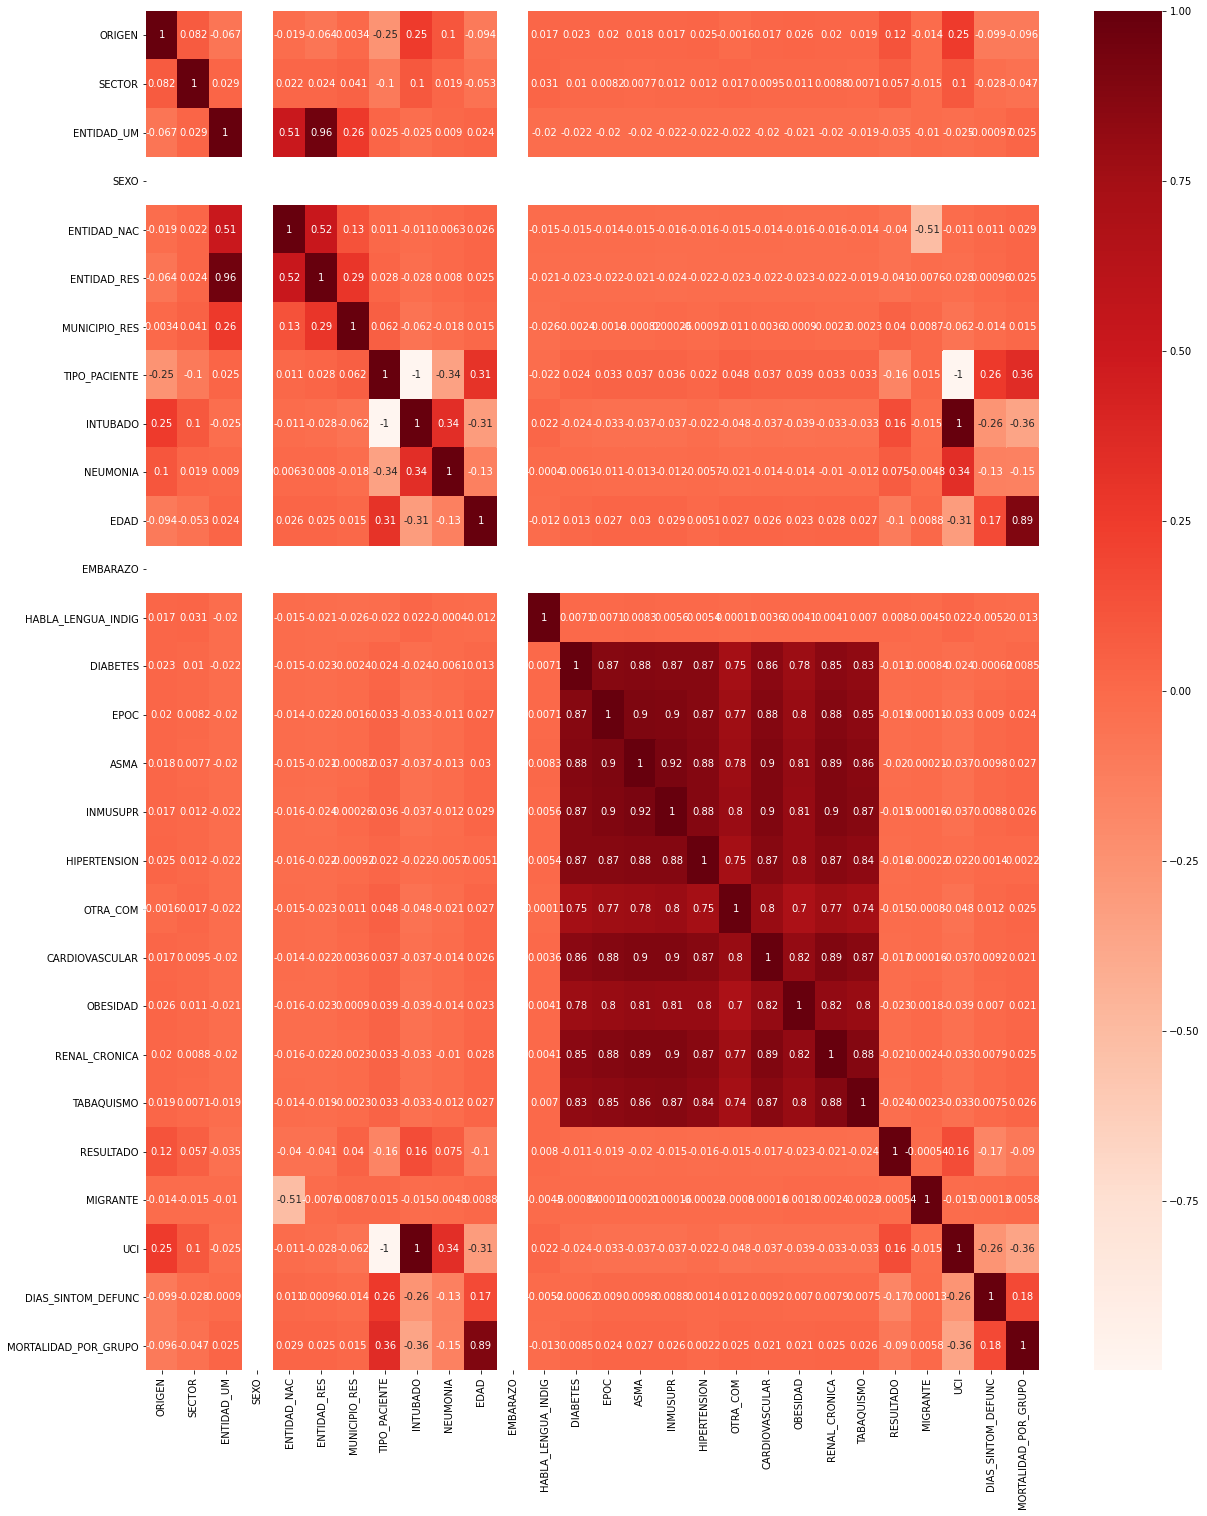

In [0]:
#Como aún queda un amplio número de categorias dentro de nuestro  set df_fem. Seleccionaremos las más correlacionadas.
#Importamos librerias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,25))
cor = df_fem.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)
plt.show()
# Se observa en el gráfico de calor que las variables que representan una enfermedad junto a la mortalidad de grupo respecto a la edad
#Donde sexo y embarazo como son variables que no tienen un cambio significativo en todo el data ya que es un conjunto de datos de población femenina.

In [0]:
cor_target = abs(cor["MORTALIDAD_POR_GRUPO"])
#Seleccionamos las caracteristicas más importantes respecto a lo que queremos saber, que es LA MORTALIDAD POR GRUPO
relevance_features = cor_target > 0.3 # Es la correlación mayor que puedo tomar para que no quedarme sin variables.

relevance_features

ORIGEN                  False
SECTOR                  False
ENTIDAD_UM              False
SEXO                    False
ENTIDAD_NAC             False
ENTIDAD_RES             False
MUNICIPIO_RES           False
TIPO_PACIENTE            True
INTUBADO                 True
NEUMONIA                False
EDAD                     True
EMBARAZO                False
HABLA_LENGUA_INDIG      False
DIABETES                False
EPOC                    False
ASMA                    False
INMUSUPR                False
HIPERTENSION            False
OTRA_COM                False
CARDIOVASCULAR          False
OBESIDAD                False
RENAL_CRONICA           False
TABAQUISMO              False
RESULTADO               False
MIGRANTE                False
UCI                      True
DIAS_SINTOM_DEFUNC      False
MORTALIDAD_POR_GRUPO     True
Name: MORTALIDAD_POR_GRUPO, dtype: bool

In [0]:
#Procedemos a tomar las categorias más significativas.
#Los cuales serían {TIPO_PACIENTE,EDAD,INTUBADO,UCI}  UCI = Si se encontraba en la unidad de Cuidados Intensivos.

Seleccion = df_fem[["TIPO_PACIENTE","EDAD","INTUBADO","UCI","MORTALIDAD_POR_GRUPO"]]
#Seleccion
lista_aux = Seleccion.MORTALIDAD_POR_GRUPO.unique()
#lista_aux
Seleccion['ID_MORTALIDAD']=0
for i in range(len(lista_aux)):
  for index, row in df_fem.iterrows():
    if lista_aux[i] == Seleccion.MORTALIDAD_POR_GRUPO[index]:
      Seleccion.ID_MORTALIDAD[index]=i+1
Seleccion

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj,

,TIPO_PACIENTE,EDAD,INTUBADO,UCI,MORTALIDAD_POR_GRUPO,ID_MORTALIDAD
2,1,37,97,97,0.036953,1
3,1,49,97,97,0.036953,1
4,2,62,2,2,0.099636,2
5,1,51,97,97,0.099636,2
6,1,42,97,97,0.036953,1
...,...,...,...,...,...,...
155922,2,70,2,2,0.151229,3
155924,1,36,97,97,0.036953,1
155925,1,41,97,97,0.036953,1
155927,1,26,97,97,0.009858,4


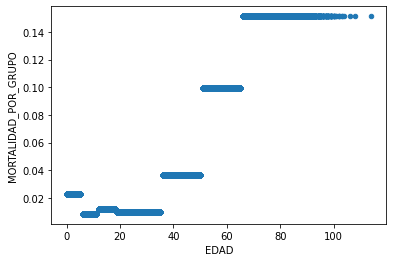

In [0]:
surveys =df_fem
my_plot = surveys.plot("EDAD", "MORTALIDAD_POR_GRUPO", kind="scatter")
plt.show() # GRAFICA con porcentaje de mortalidad por edades

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed

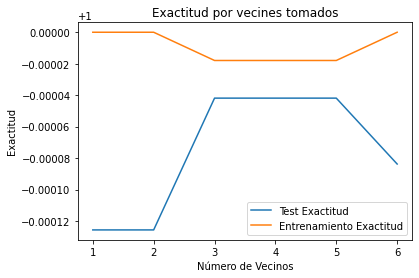

In [0]:
#Momento de las predicciones 
#Creamos un diccionario para el ingreso de los datos 
prediction= dict(zip(Seleccion.ID_MORTALIDAD,Seleccion.MORTALIDAD_POR_GRUPO))
#prediction


X = Seleccion[['TIPO_PACIENTE','EDAD','INTUBADO','UCI']]
y = Seleccion[['ID_MORTALIDAD']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 8)
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1,7)
train_exactitud = np.empty(len(neighbors))
test_exactitud = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train,y_train)
  train_exactitud [i]= knn.score(X_train,y_train)
  test_exactitud [i]= knn.score(X_test,y_test)

plt.title('Exactitud por vecines tomados')
plt.plot(neighbors,test_exactitud,label = 'Test Exactitud')
plt.plot(neighbors,train_exactitud, label = 'Entrenamiento Exactitud')
plt.legend()
plt.xlabel('Número de Vecinos')
plt.ylabel('Exactitud')
plt.show()

In [0]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
print("Probabilidad con la que el test Predice: ",knn.score(X_test, y_test))
print("Probabilidad con la que el train Predice: ",knn.score(X_train, y_train))
pred1 = knn.predict([['2','80','1','2']])
print("Probabilidades de Mortalidad ",(prediction[pred1[0]])*100 ,"%")

NameError: ignored